$$\require{mhchem}$$  
# Brusselator example
Source: https://en.wikipedia.org/wiki/Brusselator .

Brusselator is an example of autocatalytic reaction, showing oscillatory behaviour in specific conditions.

It is described by following chemical reactions:
$$
\begin{aligned}
\ce {A&->X}\\
\ce {2X + Y&->3X}\\
\ce {B + X&->Y + D}\\
\ce {X&->E}
\end{aligned}
$$
Where concentrations of $\ce{[A]}$ and $\ce{[B]}$ are fixed in time. 

#### Importing necessary modules:

In [3]:
import numpy as np
import matplotlib.pyplot as p
from chemreact import models

#### Defining chemical reactions and initial concentrations:
rate constants are equal to 1 by default

In [4]:
chem = models.Chemistry()
chem.reaction('A=>X')
chem.reaction('2X+Y=>3X')
chem.reaction('B+X=>Y+D')
chem.reaction('X=>E')

chem.initial_concentrations(A=1, B=3, X=1, Y=1)

##### Setting concentrations of $A$ and $B$ to constants:

In [5]:
#Getting the order of variables in matrix:
list(chem.variables)

['A', 'B', 'D', 'E', 'X', 'Y']

In [6]:
#Setting 0th and 1st variables coefficients to 0:
chem.stoichiometry[:,1] =np.zeros(4)
chem.stoichiometry[:,0] =np.zeros(4)

#### Running the simulation:

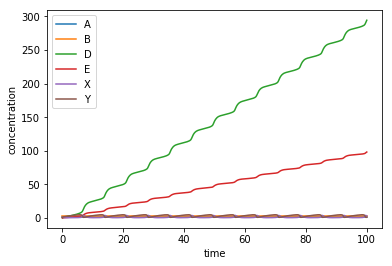

run time: 1.227s


In [7]:
chem.time_stop = 100
chem.run()

#### Plotting selected species:

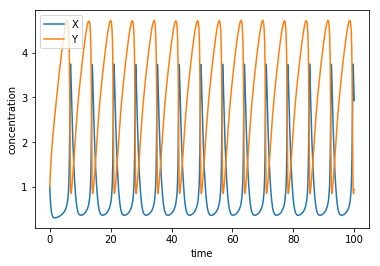

In [8]:
chem.plot('X', 'Y')

#### Plotting concentration of X vs concentration of Y

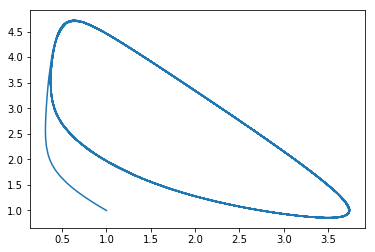

In [7]:
p.plot(chem.solution['X'], chem.solution['Y'])

## Alternative conditions: transition to stable regime

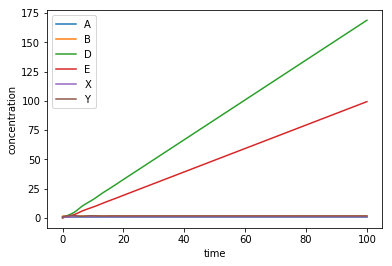

run time: 0.147s


In [12]:
chem.initial_concentrations(A=1, B=1.7, X=1, Y= 1)
chem.run()

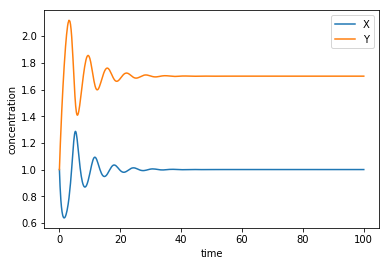

In [13]:
chem.plot('X', 'Y')

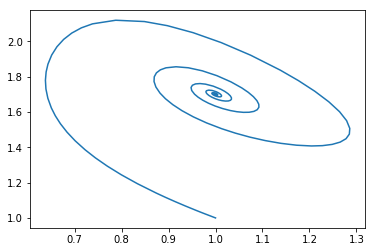

In [14]:
p.plot(chem.solution['X'], chem.solution['Y'])

#### Interactive plot

In [15]:
from ipywidgets import interact

In [17]:
@interact
def f(A=(0,3,0.01),B=(0,3,0.01)):
    chem.initial_concentrations(A=A, B=B, X=1, Y= 1)
    chem.run(plot=False)
    chem.plot('X', 'Y')
    #p.plot(chem.solution['X'], chem.solution['Y'])

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0, step=0.01), FloatSlider(value=1.0, desc…